In [1]:
import spotiphy
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import squidpy as sq
import importlib as imp
import spotiphy
import anndata as ad
import umap
imp.reload(spotiphy)

<module 'spotiphy' from 'C:\\Users\\zzheng92\\Desktop\\Spotiphy\\spotiphy\\__init__.py'>

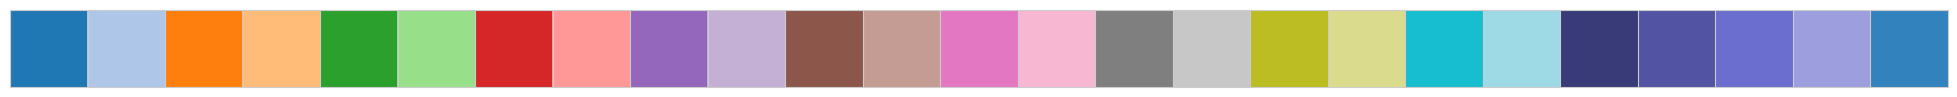

In [2]:
cmap1 = plt.get_cmap("tab20")
cmap2 = plt.get_cmap("tab20b")
cmap3 = plt.get_cmap("tab20c")
colors1 = cmap1.colors
colors2 = cmap2.colors
colors3 = cmap3.colors
contrast_palette = sns.color_palette(list(colors1) + list(colors2[:4]) + list(colors3[:1]))
del cmap1, cmap2, cmap3, colors1, colors2, colors3
sns.palplot(contrast_palette)

In [12]:
results_folder = 'results/221_merge/'
cell_proportion = np.load(results_folder+'proportion_noDAM.npy')
adata_st = sc.read_visium("F:/Ziqian Zheng/Spotiphy_data/ST/Sample221/outs")
# adata_st_decomposed = sc.read_h5ad(results_folder+'ST_decomposition_noDAM_seg.h5ad')
adata_st_decomposed = sc.read_h5ad(results_folder+'Simulated data/ST_simulated_decomposition_seg.h5ad')
adata_st_decomposed.uns['spatial'] = adata_st.uns['spatial']

anndata.py (1832): Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [16]:
# results_folder = 'results/216_merge/Simulated data/'
# cell_proportion = np.load(results_folder+'proportion_simulated.npy')
# adata_st = sc.read_h5ad(results_folder+'ST_simulated_noDAM.h5ad')
# adata_st_decomposed = sc.read_h5ad(results_folder+'ST_simulated_decomposition.h5ad')
# adata_st_decomposed.uns['spatial'] = adata_st.uns['spatial']

In [4]:
adata_sc = sc.read_h5ad("F:/Ziqian Zheng/Spotiphy_data/SCRNA/mousebrain/NewMerge_harmony_noDAM.h5ad")
key_type = 'cell_type'
type_list = sorted(list(adata_sc.obs[key_type].unique()))

In [5]:
adata_st_decomposed.obs['cell_type'].value_counts()

cell_type
Astro          2797
Pvalb          1619
Oligo          1444
L5 PT CTX      1009
CAs             877
L2/3 IT CTX     622
L4/5 IT CTX     595
L5 IT CTX       484
L6b CTX         469
L6 CT CTX       435
Sst             428
DG              399
L5/6 NP CTX     303
Microglia       303
Neutrophil      244
Vip             169
Lamp5           154
Macrophage      115
Sncg             48
TCell            24
BCell             8
Endo              6
Pericyte          4
Name: count, dtype: int64

In [13]:
cluster_df = pd.read_excel(results_folder + 'ST221segsimu.Seurat_meta.xlsx', header=0)
# cluster_df = pd.read_excel(results_folder + 'ST216simu.Seurat_meta.xlsx', header=0)
adata_st_decomposed.obs['mica_clusters'] =  cluster_df['ClusterRes'].values
seurat_clusters = adata_st_decomposed.obs.groupby('mica_clusters')['cell_type'].value_counts().unstack().fillna(0)

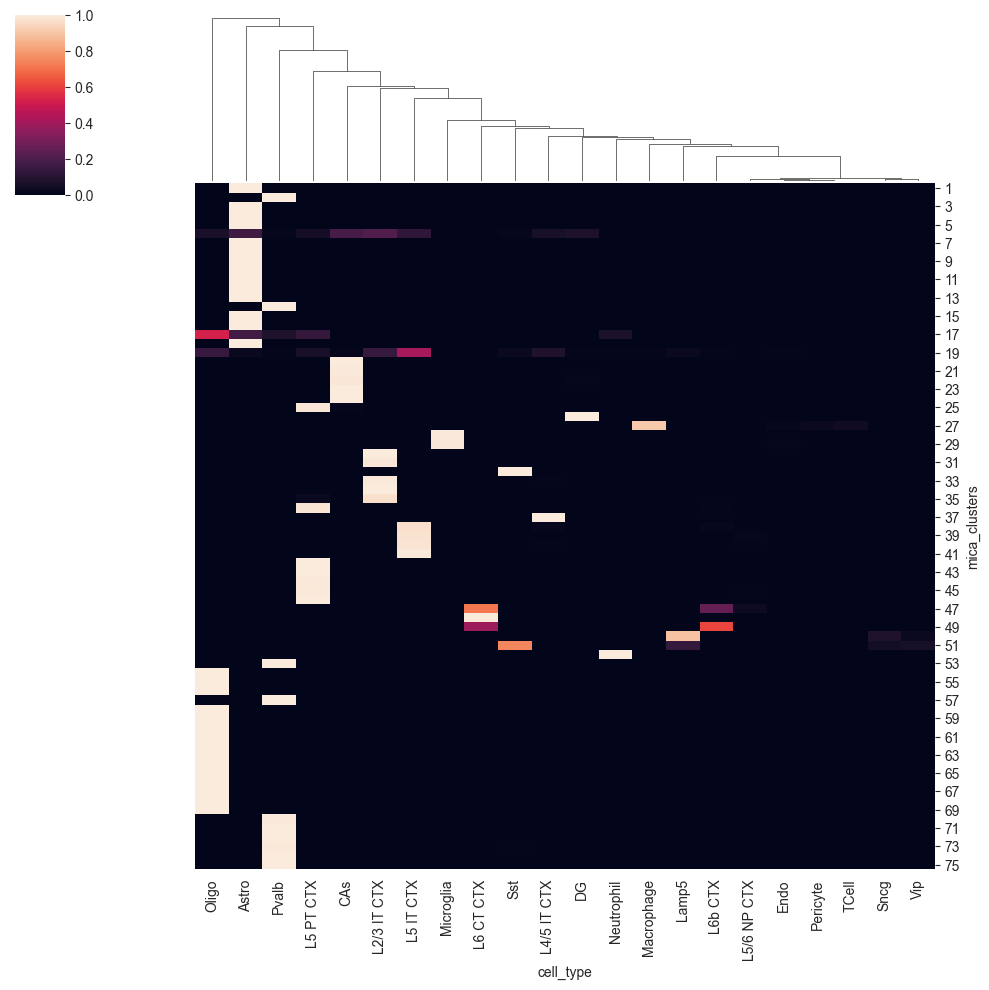

In [9]:
seurat_clusters_matrix = seurat_clusters.values
for i in range(len(seurat_clusters)):
    seurat_clusters.iloc[i] = seurat_clusters.iloc[i]/np.sum(seurat_clusters.iloc[i])
sns.clustermap(seurat_clusters, row_cluster=False)
# plt.savefig(results_folder+'Cluster location MICA/cluster_map.jpg', dpi=400)

In [13]:
%matplotlib agg
%matplotlib agg
adata_st_decomposed.obsm['spatial'] = adata_st_decomposed.obs[['location_x', 'location_y']].values
with mpl.rc_context({'figure.figsize': [7, 7], 'figure.dpi': 400}):
    cluster_column = 'mica_clusters'
    adata_st_decomposed.obs['temp'] = adata_st_decomposed.obs['n_cell']
    for i in adata_st_decomposed.obs[cluster_column].unique():
        adata_st_decomposed_temp = adata_st_decomposed[adata_st_decomposed.obs[cluster_column].values==i]
        ax = sc.pl.spatial(adata_st_decomposed_temp, color='temp', img_key='hires', size=1.3, show=False, title=str(i))
        ax[0].get_figure().savefig(results_folder+'Simulated data/Cluster location MICA/MICA_'+str(i)+'.jpg')

scatterplots.py (242): More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


In [17]:
cluster_list = [4, 10]
adata_st_decomposed.obs['temp'] = '0'
for i, cluster in enumerate(cluster_list):
    if type(cluster) == list:
        select_cell = cluster_df['ClusterRes'].isin(cluster)
    else:
        select_cell = cluster_df['ClusterRes'] == cluster
    adata_st_decomposed.obs.iloc[select_cell, -1] = str(cluster)
adata_st_decomposed.obsm['spatial'] = adata_st_decomposed.obs[['location_x', 'location_y']].values
adata_st_decomposed_temp = adata_st_decomposed[adata_st_decomposed.obs['temp'] != '0']
with mpl.rc_context({'figure.figsize': [7, 7], 'figure.dpi': 400}):
    ax = sc.pl.spatial(adata_st_decomposed_temp, color='temp', img_key='hires', size=1.3, show=False)
    ax[0].get_figure().savefig(results_folder+'Simulated data/Cluster location MICA/Astro_clusters.jpg')

anndata.py (1222): Trying to modify attribute `.obs` of view, initializing view as actual.


FileNotFoundError: [Errno 2] No such file or directory: 'results/221_merge/Simulated dataCluster location MICA/Microglia_clusters.jpg'

In [48]:
distance_matrix = np.sum(np.abs(adata_st.obsm['spatial'][:, :, np.newaxis] - cluster_df[['location_x', 'location_y']].values.T), axis=1)

In [87]:
type_list_order = ['L2/3 IT CTX', 'L4/5 IT CTX', 'L5 IT CTX', 'L5 PT CTX', 'L5/6 NP CTX', 'L6 CT CTX', 'L6b CTX', 'CAs', 'DG', 'Lamp5', 'Pvalb', 'Sncg',
                   'Sst', 'Vip', 'Endo', 'Astro', 'Oligo', 'Pericyte', 'Macrophage', 'Microglia', 'Neutrophil', 'TCell', 'BCell']
index = [np.where(np.array(type_list) == i)[0][0] for i in type_list_order]
cell_proportion_reorder = cell_proportion[:, index]

In [ ]:
cluster_list = [4, [9, 11], 5, 8, 10, [13, 14], 15, 12, 6]
standard_error = np.zeros((len(cluster_list), cell_proportion.shape[1]))
for i, cluster in enumerate(cluster_list):
    if type(cluster) == list:
        select_cell = cluster_df['ClusterRes'].isin(cluster)
    else:
        select_cell = cluster_df['ClusterRes'] == cluster
    select_spot = np.where(np.min(distance_matrix[:, select_cell], axis=1)<1)[0]
    select_proportion = cell_proportion_reorder[select_spot]
    plt.figure()
    sns.heatmap(select_proportion, xticklabels=type_list_order)
    plt.title(str(cluster))
    plt.savefig(results_folder+'Cluster location MICA/proportion_'+str(cluster)+'.jpg', dpi=400)
    standard_error[i] = np.std(select_proportion, axis=0)

<Axes: >

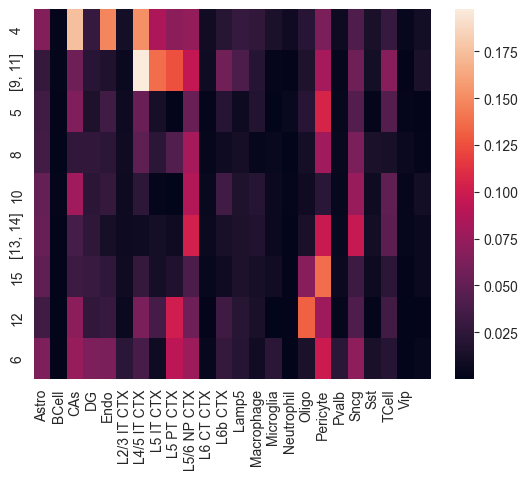

In [76]:
sns.heatmap(standard_error, xticklabels=type_list, yticklabels=[str(i) for i in cluster_list])

In [73]:
adata_st_decomposed.uns_keys()

['spatial']